<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Coefficients: 
 [25.74933698 38.9505306   0.63772629 61.44920018]
MAE: 7.722008906018746
MSE: 88.89221701994177
RMSE: 9.428266914971264


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Coeffecient
Avg. Session Length,25.749337
Time on App,38.950531
Time on Website,0.637726
Length of Membership,61.449200


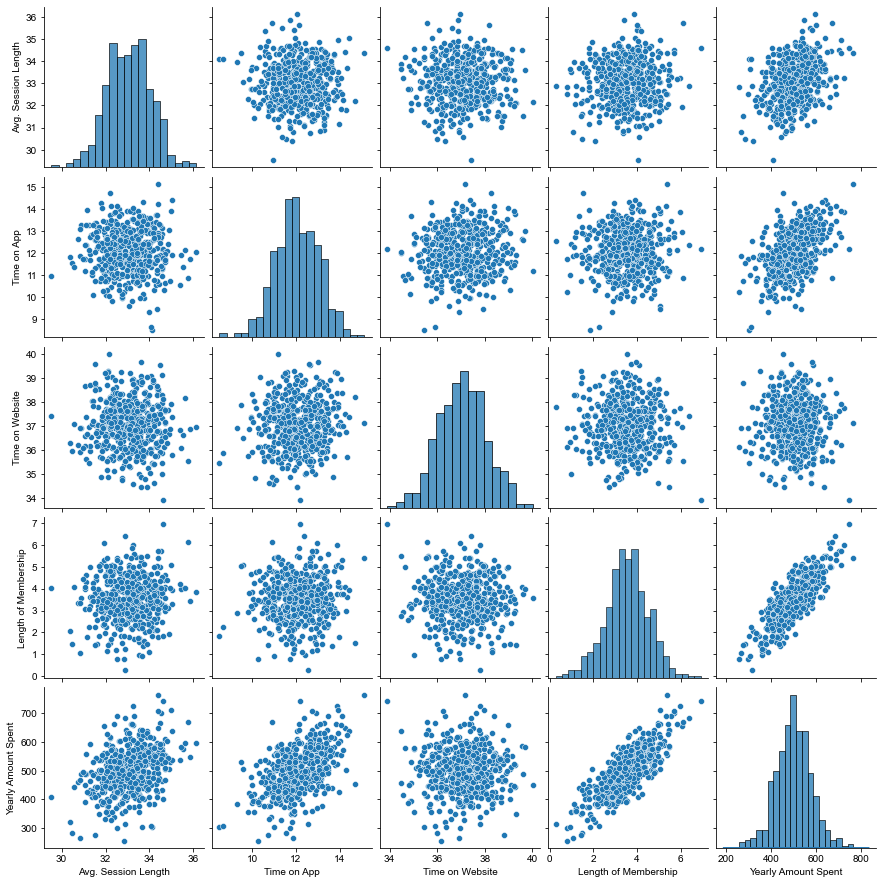

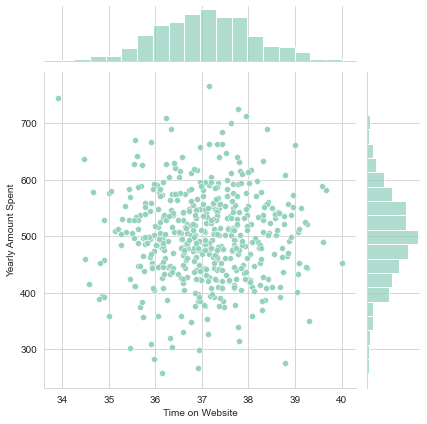

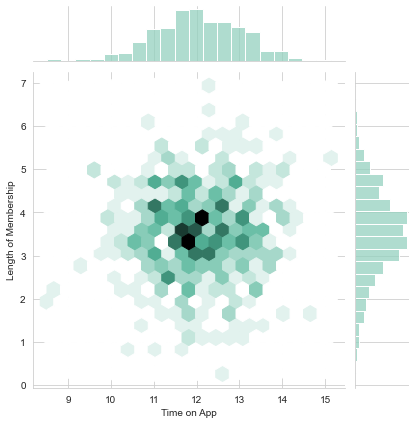

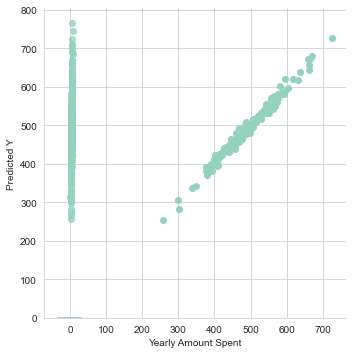

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
customers= pd.read_csv('Ecommerce Customers.csv')
customers.head()
customers.info()
customers.describe()
sns.pairplot(customers)
# length of membership
# seems to be the most correlated feature with
# yearly amount spent
sns.distplot(customers['Yearly Amount Spent'])

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)
# correlation
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

customers.columns
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)

# training
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Y')
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

sns.distplot((y_test-predictions),bins=50);

cdf = pd.DataFrame(lm.coef_,X.columns)
cdf.columns = ['Coeffecient']
cdf